In [5]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

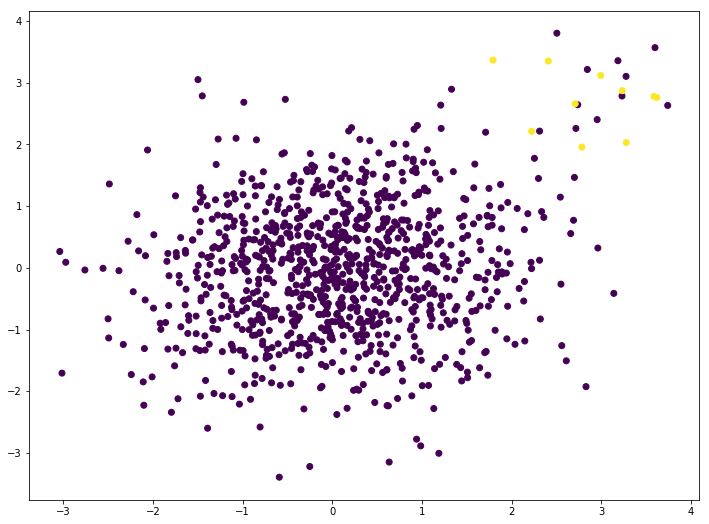

In [6]:
# Simulate the data

N = 1000
D = 2

X0 = np.random.randn(int(N*0.98), D)
X1 = np.random.randn(int(N*0.02), D)*0.5 + np.array([3, 3])
X = np.vstack((X0, X1))
PHI = np.column_stack((np.array([[1]*N]).T, X))

y = np.array([0]*int(N*0.99) + [1]*int(N*0.01))

plt.figure(figsize=(12, 9))
plt.scatter(X[:, 0], X[:,1], c = y)

In [7]:
# Functions

def sigmoid(h):
    return 1 / (1 + np.exp(-h))

def cross_entropy(y, p):
    return -np.mean(y*np.log(p) + (1-y)*np.log(1-p))

def classification_rate(y, p):
    return np.mean(y == np.round(p))

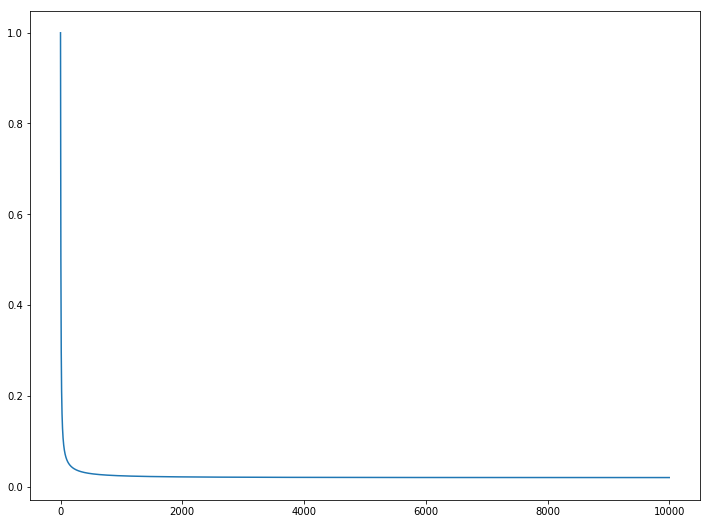

In [8]:
# Build the Model

w = np.random.rand(D + 1)

J = []
eta = 3e-1
epochs = int(1e4)

for t in range(epochs):
    p = sigmoid(PHI.dot(w))
    J.append(cross_entropy(y, p))
    w -= eta*(1/N)*PHI.T.dot(p - y)
    
plt.figure(figsize=(12,9))
plt.plot(J)

In [9]:
print("Classification Rate: {}".format(classification_rate(y, p)))

Classification Rate: 0.987


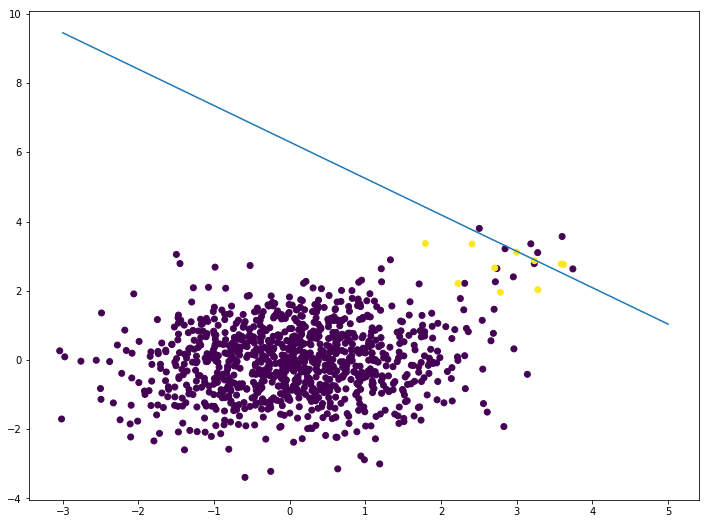

In [10]:
# Visualize the learned decision boundary

dx1 = np.linspace(-3, 5, 10)
dx2 = -(w[0]/w[2]) - (w[1]/w[2])*dx1

plt.figure(figsize=(12,9))
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.plot(dx1, dx2)

Text(0,0.5,'Cumulative True Positive Rate')

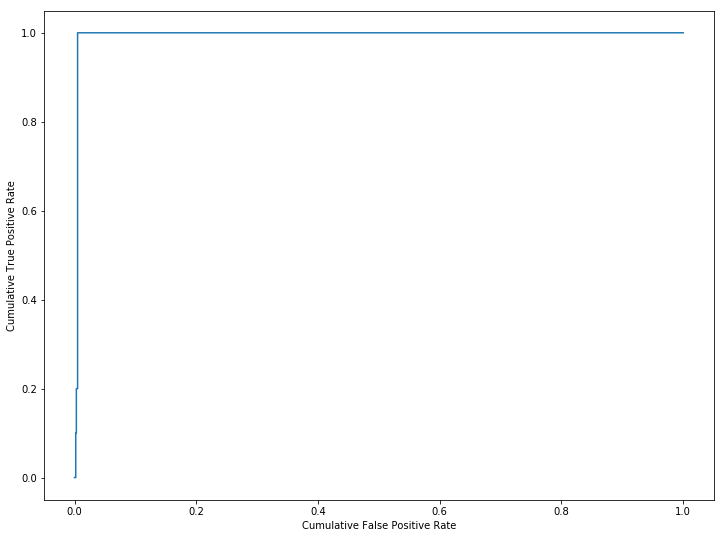

In [11]:
# ROC/AUC

roc_matrix = np.column_stack((p, np.round(p), y))
roc_matrix = roc_matrix[roc_matrix[:,0].argsort()[::-1]]

tp = np.cumsum((roc_matrix[:,1] == 1) & (roc_matrix[:,2] == 1)) / np.sum(roc_matrix[:,2] == 1)
fp = np.cumsum((roc_matrix[:,1] == 1) & (roc_matrix[:,2] == 0)) / np.sum(roc_matrix[:,2] == 0)

tp = np.array([0] + tp.tolist() + [1])
fp = np.array([0] + fp.tolist() + [1])

plt.figure(figsize = (12,9))
plt.step(fp, tp)
plt.xlabel("Cumulative False Positive Rate")
plt.ylabel("Cumulative True Positive Rate")

In [12]:
auc = np.sum(w*h for h, w in zip(tp[1:], [b-a for a, b in zip(fp, fp[1:])]))

print("ROC/AUC: {}".format(auc))

ROC/AUC: 0.9954545454545454


In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,